# SPAM Convergence

In [9]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import copy

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [10]:
def train_spam(spam, num_iter_list, inputs, targets):
    model_list = []
    spam.pretrain(num_iter = 500, verbose=False)
    for num_iter in num_iter_list:
        spam.train(num_iter = num_iter, 
                   inputs = inputs, 
                   targets = targets, 
                   verbose=False)
        spam_copy = copy.deepcopy(spam)
        spam_copy.optimizer = None
        model_list.append(spam_copy)

    return model_list
    

## Three Qubits

### Full POVM

In [11]:
n=3
d=2**n
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spam_target = generate_spam_benchmark(n=n, c1=0.99, c2=0.85)
inputs, targets = generate_spam_data(spam_target, N_spam=None, shots=1024)

spam_model = SPAM(InitialState(d), 
                  POVM(d),
                  optimizer = tf.optimizers.Adam(learning_rate=0.01))

spam_model.pretrain(num_iter=500, verbose=False)

init_fid_list = []
povm_fid_list = []

for i in range(30):
    spam_model.train(num_iter = 100, 
                     inputs = inputs, 
                     targets = targets,
                     verbose=False)
    init_fid = state_fidelity(spam_model.init.init, spam_target.init.init)
    povm_fid = povm_fidelity(spam_model.povm.povm, spam_target.povm.povm)
    init_fid_list.append(init_fid)
    povm_fid_list.append(povm_fid)

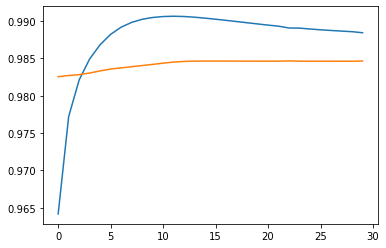

In [12]:
plt.plot(init_fid_list)
plt.plot(povm_fid_list)

### Corruption Matrix

In [13]:
n=3
d=2**n
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spam_target = generate_spam_benchmark(n=n, c1=0.9, c2=0.85)
inputs, targets = generate_spam_data(spam_target, N_spam=None, shots=1024)

spam_model = SPAM(InitialState(d), 
                  CorruptionMatrix(d),
                  optimizer = tf.optimizers.Adam(learning_rate=0.01))

spam_model.pretrain(num_iter=500, verbose=False)

init_fid_3q_corr_list = []
povm_fid_3q_corr_list = []

for i in range(30):
    spam_model.train(num_iter = 100, 
                     inputs = inputs, 
                     targets = targets,
                     verbose=False)
    init_fid = state_fidelity(spam_model.init.init, spam_target.init.init)
    povm_fid = povm_fidelity(spam_model.povm.povm, spam_target.povm.povm)
    init_fid_3q_corr_list.append(init_fid)
    povm_fid_3q_corr_list.append(povm_fid)

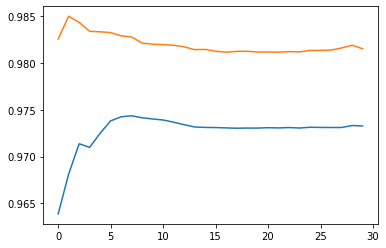

In [14]:
plt.plot(init_fid_3q_corr_list)
plt.plot(povm_fid_3q_corr_list)

## Four Qubit

In [16]:
n=4
d=2**n
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spam_target = generate_spam_benchmark(n=n, c1=0.8, c2=0.8)
inputs, targets = generate_spam_data(spam_target, N_spam=None, shots=1024)

spam_model = SPAM(InitialState(d), 
                  POVM(d),
                  optimizer = tf.optimizers.Adam(learning_rate=0.01))

spam_model.pretrain(num_iter=500, verbose=False)

init_fid_4q_list = []
povm_fid_4q_list = []

for i in range(30):
    spam_model.train(num_iter = 100, 
                     inputs = inputs, 
                     targets = targets,
                     verbose=False)
    init_fid = state_fidelity(spam_model.init.init, spam_target.init.init)
    povm_fid = povm_fidelity(spam_model.povm.povm, spam_target.povm.povm)
    init_fid_4q_list.append(init_fid)
    povm_fid_4q_list.append(povm_fid)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

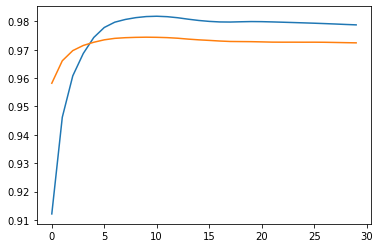

In [15]:
plt.plot(init_fid_4q_list)
plt.plot(povm_fid_4q_list)

## Corruption Matrix

In [16]:
n=4
d=2**n
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spam_target = generate_spam_benchmark(n=n, c1=0.8, c2=0.8)
inputs, targets = generate_spam_data(spam_target, N_spam=None, shots=1024)

spam_model = SPAM(InitialState(d), 
                  CorruptionMatrix(d),
                  optimizer = tf.optimizers.Adam(learning_rate=0.01))

spam_model.pretrain(num_iter=500, verbose=False)

init_fid_4q_list = []
povm_fid_4q_list = []

for i in range(30):
    spam_model.train(num_iter = 100, 
                     inputs = inputs, 
                     targets = targets,
                     verbose=False)
    init_fid = state_fidelity(spam_model.init.init, spam_target.init.init)
    povm_fid = povm_fidelity(spam_model.povm.povm, spam_target.povm.povm)
    init_fid_4q_list.append(init_fid)
    povm_fid_4q_list.append(povm_fid)

KeyboardInterrupt: 

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


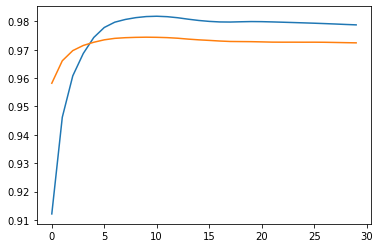

In [ ]:
plt.plot(init_fid_4q_list)
plt.plot(povm_fid_4q_list)